## Spam Classifier

<pre>
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
</pre>


### Importing files and Libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data = data[['v1','v2']]

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.rename(columns={'v1':'target',
                     'v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder in sklearn is a utility used to convert catrgorical labels or other
#non-numerical data into numerical form. 

In [10]:
encoder = LabelEncoder()

In [11]:
data['target']=encoder.fit_transform(data['target'])

In [12]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Always check for missing values. 

data.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicate values

data.duplicated().sum()

403

In [15]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

## EDA

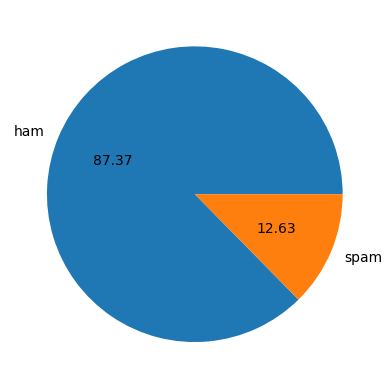

In [17]:
# calculating the percentage of ham and spam
import matplotlib.pyplot as plt 

plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data is imbalanced

In [17]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
#counting number of characters being used in text

data['characters_num'] = data['text'].apply(len)

In [20]:
#counting number of words

data['word_count'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
#counting number of sentences in each message 

data['sentence_count'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
data.head()

,target,text,characters_num,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
data[['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#ham messages
data[data['target']==0][['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#spam messages
data[data['target']==1][['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


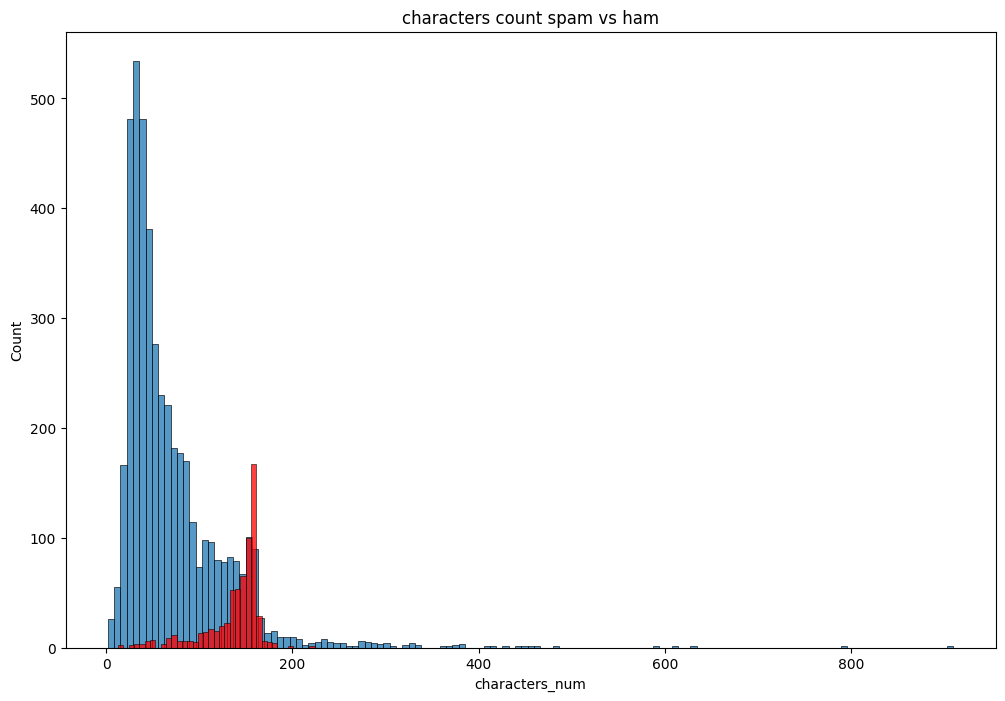

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['characters_num'])
sns.histplot(data[data['target']==1]['characters_num'],color='red')
plt.title('characters count spam vs ham')
plt.show()


In [28]:
# from above we can see that number of characters used in ham msg are greater than spam messages

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


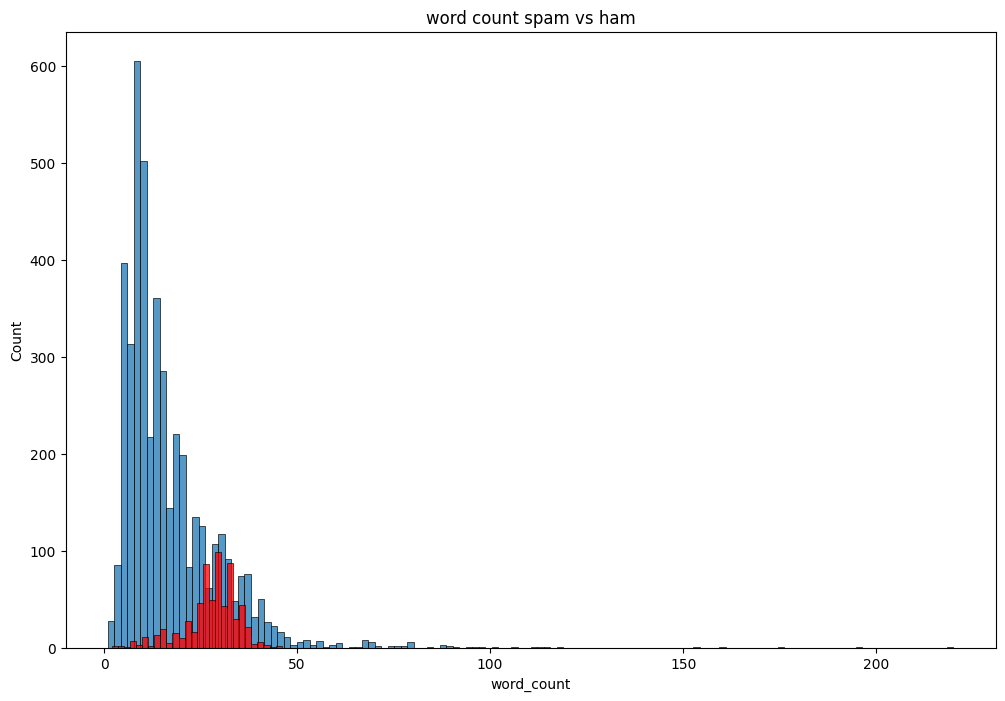

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['word_count'])
sns.histplot(data[data['target']==1]['word_count'],color='red')
plt.title('word count spam vs ham')
plt.show()

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


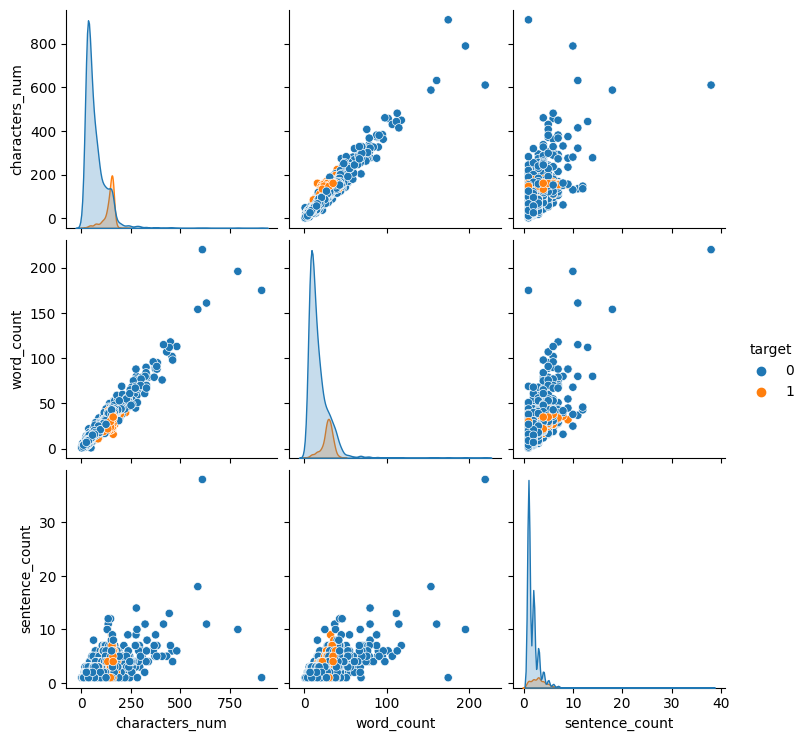

In [30]:
# Relationships between the column

sns.pairplot(data,hue='target')

In [31]:
# we can see outlines in the data. 

<Axes: >

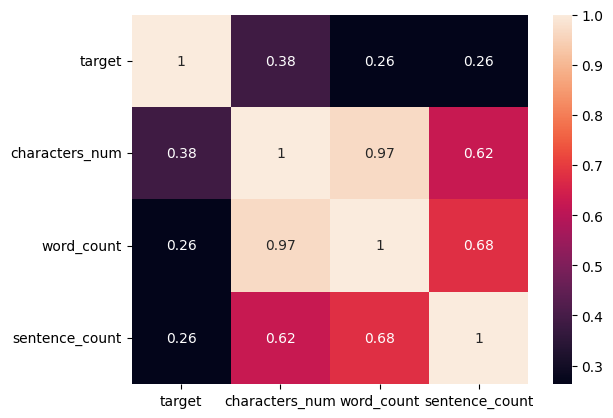

In [32]:
sns.heatmap(data[['target','characters_num','word_count','sentence_count']].corr(),annot=True)

In [33]:
# as the correlation between characters_num, word_count, sentence_count is very high.
# we will only keep one of the columns in our data.
# As the variation of the target with character_num is high. That is the one remaining.

## Data preprocessing

<pre>

Inorder to find the top words used in ham and spam we do the following.

1. Lower case
2. Tokenization
3. Removing Special characters
4. Removing stop words
5. Removing punctuation
6. stemming
</pre>

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()



In [36]:
def text_transformation(text):
    
    #converting to lower and tokenizing
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    #removing punctuation and stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            

    text = y[:]
    y.clear()
    #stemming

    for i in text:
        y.append( ps.stem(i))


    return  " ".join(y)

In [37]:
text_transformation('Hi, how#re you doing megha?')

'hi megha'

In [38]:
data['transformed_text'] = data['text'].apply(text_transformation)

<p>A <b>Wordcloud</b> is a visual representation of the most frequently occuring words in a text or dataset. The size and prominence of each word in the cloud indicate its frequency or importance. </p>

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=50,background_color='white')

In [40]:
spam_wc=wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

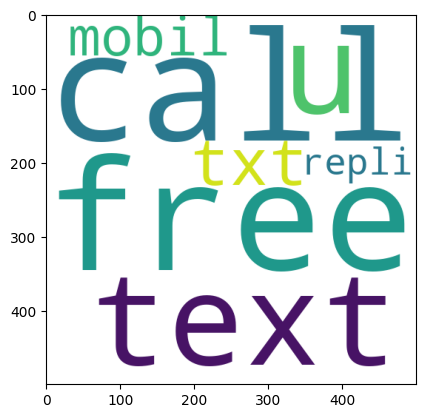

In [41]:
plt.imshow(spam_wc)

In [42]:
# top 30 words used in ham

spam_word = []

for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_word.append(word)



from collections import Counter

most_used_words_spam = pd.DataFrame(Counter(spam_word).most_common(20))




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

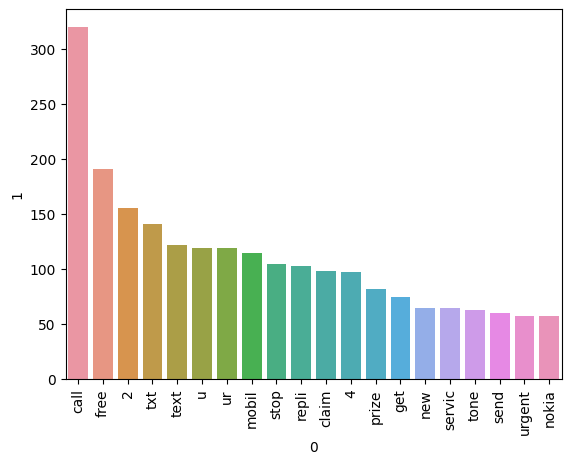

In [43]:
sns.barplot(x=most_used_words_spam[0],y=most_used_words_spam[1])
plt.xticks(rotation='vertical')

## Model Building

In [44]:
# Naive bayes such algorithms take numerical input. We will be comverting 
# transformed text to numerical vectors (vectorization).

In [45]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [46]:
#X = cv.fit_transform(data['transformed_text']).toarray()
X = cv.fit_transform(data['transformed_text']).toarray()

In [47]:
Y=data['target'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb= BernoulliNB()

In [52]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [53]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))


0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [54]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [55]:
 # As the data is imbalanced we prefer precision over accuracy.
# Here bnb is giving more precision than all the other models


In [83]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 0.2/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.2/124.9 MB 2.1 MB/s eta 0:01:01
   ---------------------------------------- 0.4/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.4/124.9 MB 2.0 MB/s eta 0:01:02
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 0.6/124.9 MB 1.9 MB/s eta 0:01:06
   ---------------------------------------- 0.7/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.8/124.9 MB 1.9 MB/s eta 0:01:04
   ---------------------------------------- 0.9/124.9 MB 2.0 MB/s eta 0:01:03
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 1.0/124.9 MB 1.9 MB/s eta 0


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [58]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.9323017408123792
Precision -  0.7741935483870968
For  NB
Accuracy -  0.9690522243713733
Precision -  0.9015151515151515
For  DT
Accuracy -  0.9516441005802708
Precision -  0.8928571428571429
For  LR
Accuracy -  0.97678916827853
Precision -  0.9523809523809523
For  RF
Accuracy -  0.971953578336557
Precision -  0.990990990990991


c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9133858267716536
For  BgC
Accuracy -  0.9680851063829787
Precision -  0.9069767441860465
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9426229508196722


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


## Model Improvement

<p>
While using Tdidf vectorization instead of taking all the unique words. 
The words being used can be restricted. 



 tuning max_features in TF-IDF is a balance between informative feature selection and computational efficiency. Lower values simplify the model but may reduce accuracy, while higher values provide richer representations but increase the risk of noise and computational cost.


Scaling can also be included for improving the model's performance

</p>

In [85]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [86]:
#X = cv.fit_transform(data['transformed_text']).toarray()
X = cv.fit_transform(data['transformed_text']).toarray()

In [87]:
# appending the num character to col to x

X= np.hstack((X,data['characters_num'].values.reshape(-1,1)))

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [88]:
Y=data['target'].values

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb= BernoulliNB()

In [100]:
gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))


0.8781431334622823
[[791 105]
 [ 21 117]]
0.527027027027027


In [101]:
mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))


0.9729206963249516
[[881  15]
 [ 13 125]]
0.8928571428571429


In [102]:
bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [66]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [67]:
new_df = performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.900387,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379
3,LR,0.971954,0.990991,0.971954,0.990991
4,xgb,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444
7,DT,0.924565,0.916667,0.924565,0.916667
8,BgC,0.962282,0.915966,0.962282,0.915966
9,SVC,0.966151,0.899225,0.966151,0.899225


In [74]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [75]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [76]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.906190,1.000000,0.906190,1.000000,0.900387,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.971954,0.990991
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,DT,0.926499,0.942857,0.924565,0.916667,0.926499,0.942857
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.972921,0.892857
